In [212]:
from commonfunctions import *

In [213]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import numpy as np
import argparse
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import pytesseract

import skimage
import skimage.io as io
import matplotlib.pyplot as plt
from skimage import filters, feature
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
from scipy.ndimage import median_filter
import cv2 as cv

# Convolution:
from scipy.signal import convolve2d
from scipy import fftpack
import math

In [214]:

from typing import List


def get_largest_contour_list(contour_lists: List[List]) -> List[List]:
    """
    Returns a list containing the contour list with the largest number of contours.
    
    Parameters:
    - contour_lists (List[List]): A list containing multiple lists of contours.

    Returns:
    - List[List]: A list containing the contour list with the maximum number of contours.
    """
    # Handle empty input
    if not contour_lists:
        return []
    if not contour_lists:
        raise ValueError("Input must contain at least one list of contours.")
    
    # Find the list with the maximum number of contours
    largest_contour_list = max(contour_lists, key=len)
    
    # Return as a list containing only the largest contour list
    return [largest_contour_list]

# Function for bright RGB image enhancement
def enhance_bright_image_rgb(image):
    enhanced_image = image.copy()
    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                if 200 <= pixel_value <= 230:
                    # Scale pixel value between 240 and 255
                    enhanced_image[y, x, channel] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
                elif pixel_value > 230:
                    # Keep values above 230 as they are
                    enhanced_image[y, x, channel] = 255
                else:
                    # Keep values below 200 unchanged
                    enhanced_image[y, x, channel] = pixel_value
    return enhanced_image

# Function for dark RGB image enhancement
def enhance_dark_image_rgb(image):
    enhanced_image = image.copy()
    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                if 130 <= pixel_value <= 200:
                    # Scale pixel value between 230 and 255
                    enhanced_image[y, x, channel] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
                elif pixel_value > 200:
                    # Keep values above 200 as they are
                    enhanced_image[y, x, channel] = 255
                else:
                    # Keep values below 130 unchanged
                    enhanced_image[y, x, channel] = pixel_value
    return enhanced_image

def enhance_very_dark_image_rgb(image):
    enhanced_image = image.copy()
    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                if 90 <= pixel_value <= 150:
                    # Scale pixel value between 230 and 250
                    enhanced_image[y, x, channel] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                elif pixel_value > 150:
                    # Keep values above 150 as they are
                    enhanced_image[y, x, channel] = pixel_value
                else:
                    # Keep values below 90 unchanged
                    enhanced_image[y, x, channel] = pixel_value
    return enhanced_image

def enhance_bright_image(image):
    enhanced_image = image.copy()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
            if 200 <= pixel_value <= 230:
                # Scale pixel value between 240 and 255
                enhanced_image[y, x] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
            elif pixel_value > 230:
                # Keep values above 230 as they are
                enhanced_image[y, x] = 255
            else:
                # Keep values below 200 unchanged
                enhanced_image[y, x] = pixel_value
    return enhanced_image

def enhance_dark_image(image):
    enhanced_image = image.copy()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
            if 130 <= pixel_value <= 200:
                # Scale pixel value between 230 and 255
                enhanced_image[y, x] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
            elif pixel_value > 200:
                # Keep values above 200 as they are
                enhanced_image[y, x] = 255
            else:
                # Keep values below 130 unchanged
                enhanced_image[y, x] = pixel_value
    return enhanced_image

def calculate_percentage_of_ones(binary_img):
    

    # Calculate the number of 1's
    num_ones = np.count_nonzero(binary_img)

    # Calculate the total number of pixels
    total_pixels = binary_img.size

    # Calculate the percentage of 1's
    percentage_of_ones = (num_ones / total_pixels) * 100

    return percentage_of_ones



# Function for enhancing both dark and bright RGB image enhancement
def enhance_image_rgb(image):
    enhanced_image = image.copy()

    for channel in range(3):  # Process R, G, B channels
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                pixel_value = image[y, x, channel]
                
                # Enhance dark to very dark pixel values (90 to 200)
                if 90 <= pixel_value <= 200:
                    if pixel_value <= 130:
                        # Scale very dark pixels between 90 and 150 to 230 to 250
                        enhanced_image[y, x, channel] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                    elif pixel_value <= 200:
                        # Scale dark pixels between 130 and 200 to 230 to 255
                        enhanced_image[y, x, channel] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
                # Enhance bright pixels (200 to 230 range)
                elif 200 <= pixel_value <= 230:
                    # Scale bright pixels between 200 and 230 to 240 to 255
                    enhanced_image[y, x, channel] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
                elif pixel_value > 230:
                    # Keep values above 230 as they are (already maximized)
                    enhanced_image[y, x, channel] = 255
                else:
                    # Keep values below 90 unchanged (dark/black areas)
                    enhanced_image[y, x, channel] = pixel_value

    return enhanced_image

def enhance_image(image):
    enhanced_image = image.copy()

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pixel_value = image[y, x]
                
            # Enhance dark to very dark pixel values (90 to 200)
            if 90 <= pixel_value <= 200:
                if pixel_value <= 130:
                    # Scale very dark pixels between 90 and 150 to 230 to 250
                    enhanced_image[y, x] = 230 + (pixel_value - 90) * (250 - 230) // (150 - 90)
                elif pixel_value <= 200:
                    # Scale dark pixels between 130 and 200 to 230 to 255
                    enhanced_image[y, x] = 230 + (pixel_value - 130) * (255 - 230) // (200 - 130)
            # Enhance bright pixels (200 to 230 range)
            elif 200 <= pixel_value <= 230:
                # Scale bright pixels between 200 and 230 to 240 to 255
                enhanced_image[y, x] = 240 + (pixel_value - 200) * (255 - 240) // (230 - 200)
            elif pixel_value > 230:
                # Keep values above 230 as they are (already maximized)
                enhanced_image[y, x] = 255
            else:
                # Keep values below 90 unchanged (dark/black areas)
                enhanced_image[y, x] = pixel_value

    return enhanced_image

from scipy.signal import find_peaks, peak_widths
def has_salt_and_pepper_noise(image):
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Flatten the image for histogram analysis
    flattened_image = image.flatten()
    hist, bins = np.histogram(flattened_image, bins=256, range=(0, 255))

    # Detect peaks
    peaks, properties = find_peaks(hist, prominence=0.1 * np.max(hist))  # Prominent peaks
    widths = peak_widths(hist, peaks, rel_height=0.5)[0]  # Measure widths at half prominence

    # Filter peaks that are narrow (spikes)
    spike_indices = [i for i, width in enumerate(widths) if width <= 2]  # Adjust width threshold
    spikes = peaks[spike_indices]

    # Count spikes
    num_spikes = len(spikes)
    print(f"Detected Impulses (Spikes): {num_spikes}")

    # Decision based on spike count
    if num_spikes >= 5:  # Adjust threshold as needed
        return True
    return False


# checks whether the red channel is dominating 
def detect_dominant_red_channel(image, red_threshold=1.3):
    # Ensure the image has 3 channels (RGB)
    if image.shape[-1] != 3:
        raise ValueError("Image must be an RGB image")

    # Split the image into R, G, B channels
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]

    # Calculate the mean intensity of each channel
    mean_R = np.mean(R)
    mean_G = np.mean(G)
    mean_B = np.mean(B)

    print(f"Mean R: {mean_R:.2f}, Mean G: {mean_G:.2f}, Mean B: {mean_B:.2f}")

    # Check if the red channel is dominant compared to green and blue
    if mean_R > red_threshold * mean_G and mean_R > red_threshold * mean_B:
        print("The red channel is dominant.")
        return True
    else:
        print("The red channel is not dominant.")
        return False
    
# function used to equalize the red channel
def equalizeredchannel(img):
    img = img.astype(np.float32)
    
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]

    original_red = np.clip(red_channel / 1.5, 0, 255).astype(np.uint8)
    
    equalized_img = np.stack((original_red, green_channel, blue_channel), axis=2).astype(np.uint8)
    return equalized_img
    
# checks if the image contains additive noise or not
def detect_gaussian_noise(image, threshold_std=10):
    #  Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        gray = image

    # Smooth the image using Gaussian Blur
    blurred = cv.GaussianBlur(gray, (5, 5), 1.0)

    # Subtract the blurred image from the original image to isolate noise
    noise = gray.astype(np.float32) - blurred.astype(np.float32)

    # Calculate the standard deviation of the noise
    noise_std = np.std(noise)
    print(f"Noise Standard Deviation: {noise_std:.2f}")

    # Threshold to classify noise
    if noise_std > threshold_std:
        print("Gaussian noise detected.")
        return True
    else:
        print("No significant Gaussian noise detected.")
        return False

Detected Impulses (Spikes): 3
No salt and pepper noise detected.
Mean R: 114.61, Mean G: 115.99, Mean B: 112.83
The red channel is not dominant.
No excessive red channel detected.
Noise Standard Deviation: 4.17
No significant Gaussian noise detected.
Image does not contain significant Gaussian noise.
The percentage of 1's in the image is 97.72%


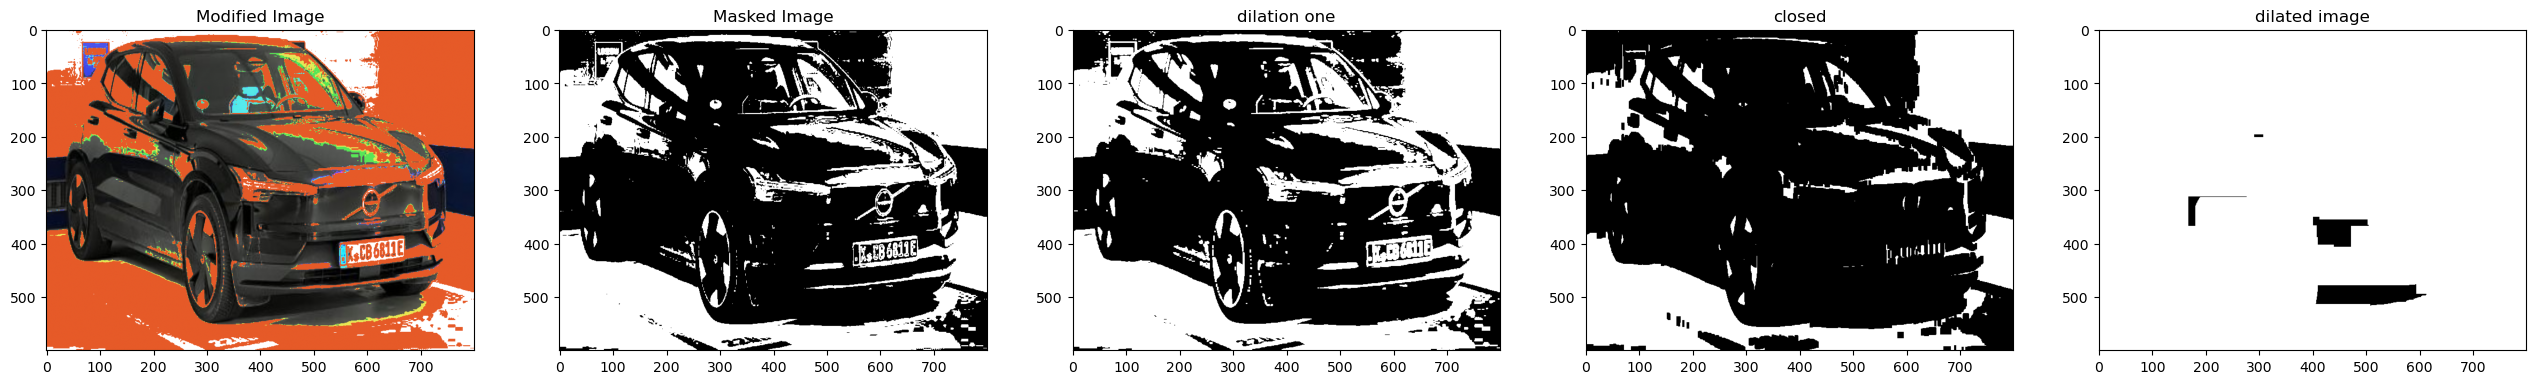

In [215]:
# 1- Get the required RGB color (Using a color picker)

# failed : 20 21 23 15 31 32 33 34 37 38
img = cv.imread('../plate-detection/11.jpg')

if img.shape[0] < 800 and img.shape[1] < 600:
    img = cv.resize(img, (800, 600))
imgg = img
if has_salt_and_pepper_noise(img):
    print("Salt and pepper noise detected!")
    img = median_filter(img, size = 3)
else:
    print("No salt and pepper noise detected.")

# Assuming img is your input image
if img.dtype == np.float64:
    # Convert the image to uint8
    img = img.astype(np.uint8)

    # Or use .astype(np.uint8) directly if the values are already in [0, 255]

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
image = np.copy(img)
if img.shape[2] == 4:
    image = rgba2rgb(image)
if detect_dominant_red_channel(image):
    print("Excessive red channel detected.")
    img = equalizeredchannel(img)
else:
    print("No excessive red channel detected.")

if detect_gaussian_noise(img, threshold_std=15):
    print("Image contains additive Gaussian noise.")
    img = gaussian(img, sigma = 1.3)
else:
    print("Image does not contain significant Gaussian noise.")


if len(img.shape) == 3:
    height , width , channel = img.shape
elif len(img.shape) == 2:
    height , width  = img.shape


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)



img = enhance_image_rgb(img)



TragetColor = np.array([240/255,240/255,240/255]) 

# 2- Read image

img = img.astype(float) / 255

# 3- Extract R, G, and B channels (as float)
RedChannel = img[:,:,0]
GreenChannel = img[:,:,1]
BlueChannel = img[:,:,2]

# 4- Calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
DiffRed = np.abs(RedChannel - TragetColor[0])
DiffGreen = np.abs(GreenChannel - TragetColor[1])
DiffBlue = np.abs(BlueChannel - TragetColor[2])

# 5- Calculate overall distance from the given RGB color (use Euclidean distance)
Distance = np.sqrt(DiffRed**2 + DiffGreen**2 + DiffBlue**2)

# 6- Create a mask by thresholding the differences
Threshold = 0.1
Mask = np.where(Distance < Threshold , True,False)

# 7- Replace the pixels of the mask with the new color (R=230, G=90, B=40)
ReplacedColor = np.array([230/255, 90/255, 40/255])

# Create a copy of the image to apply the changes
modified_img = np.copy(img)


struct_elem = np.ones((2, 3))
img_dilated1 = binary_dilation(Mask, struct_elem).astype(img.dtype)


struct_elem = np.ones((12, 4))
img_closed = binary_erosion(img_dilated1, struct_elem).astype(img.dtype)

struct_elem = np.ones((70, 180))
img_dilated = binary_dilation(img_closed, struct_elem).astype(img.dtype)

percentageOfOnes   = calculate_percentage_of_ones(img_dilated )
# Apply the new color where the mask is True
modified_img[Mask] = ReplacedColor

print(f"The percentage of 1's in the image is {percentageOfOnes:.2f}%")


show_images([modified_img, Mask, img_dilated1 ,img_closed ,img_dilated], ["Modified Image","Masked Image", "dilation one" , "closed","dilated image"])

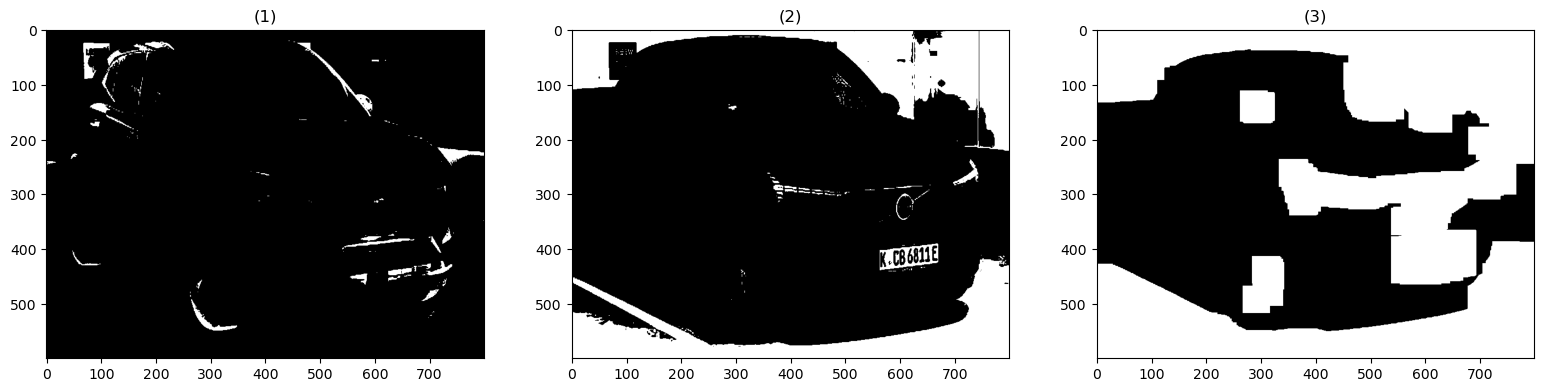

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


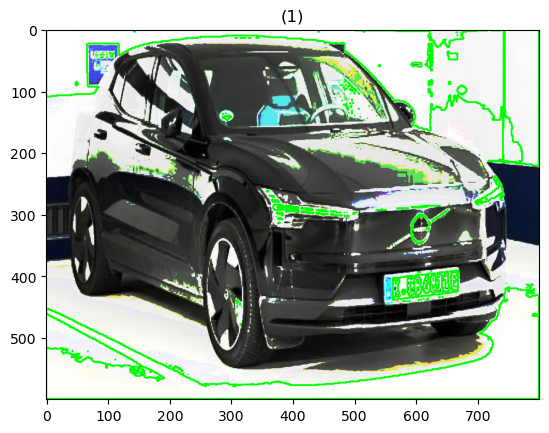

In [216]:
# Convert to binary image using a simple threshold
ret, binary_img = cv.threshold(gray, 210, 255, cv.THRESH_BINARY)
thresholded_img_adaptive = cv.adaptiveThreshold(gray , maxValue=255.0 , adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C
                                        ,thresholdType=cv.THRESH_BINARY_INV, blockSize=71,C=71)



struct_elem = np.ones((50,50))
img_Dilatedd_adaptive = binary_dilation(binary_img, struct_elem).astype(img.dtype)








# Show images
show_images([ thresholded_img_adaptive,binary_img, img_Dilatedd_adaptive])

# Optionally, visualize contours on the labeled image
contours, _ = cv.findContours(binary_img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
contours_img = cv.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)
show_images([contours_img ])

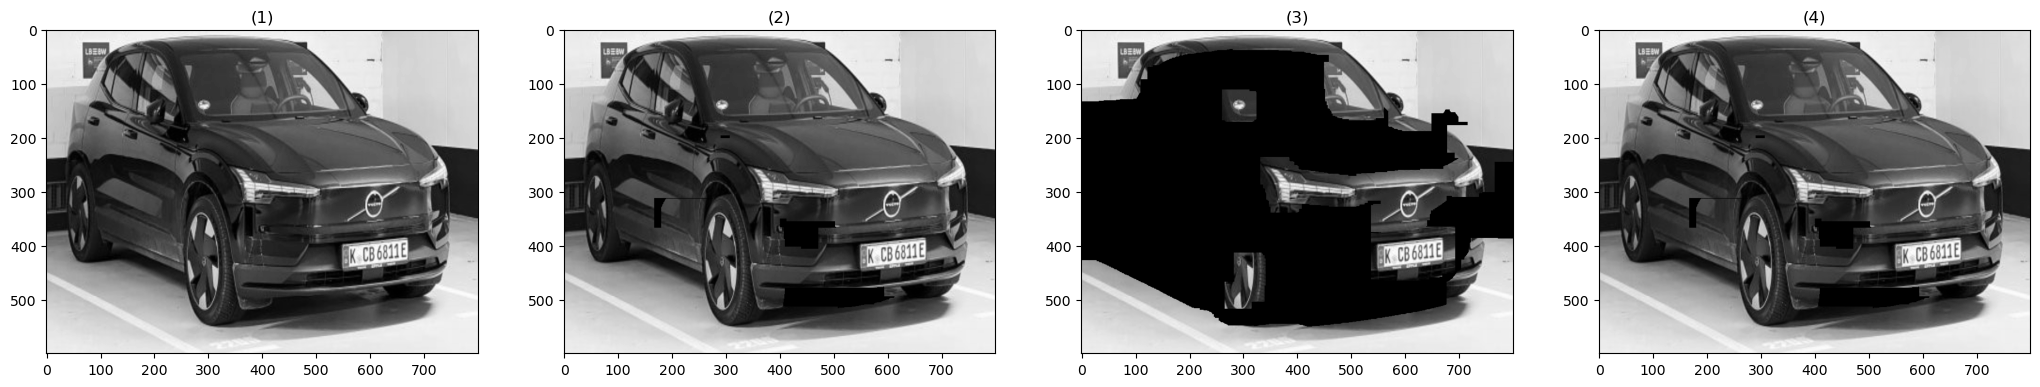

In [217]:
masked_img_dilated = np.zeros_like(gray)  # Create an empty array with the same shape as gray
masked_img_dilated[img_dilated >= 1] = gray[img_dilated >= 1]  # Retain the grayscale values where mask is 255

masked_img_dilated_adaptivaly = np.zeros_like(gray)  # Create an empty array with the same shape as gray
masked_img_dilated_adaptivaly[img_Dilatedd_adaptive >= 1] = gray[img_Dilatedd_adaptive >= 1]  # Retain the grayscale values where mask is 255


if percentageOfOnes >= 90 and percentageOfOnes <91:
    output_img = masked_img_dilated_adaptivaly
elif percentageOfOnes >=99:
    output_img = masked_img_dilated_adaptivaly
else:
    output_img = masked_img_dilated
# Show the original grayscale and the masked grayscale image
show_images([gray ,masked_img_dilated ,masked_img_dilated_adaptivaly , output_img ])




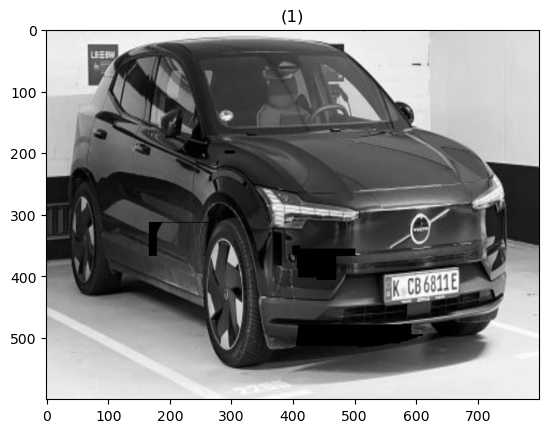

In [218]:
show_images([output_img ])

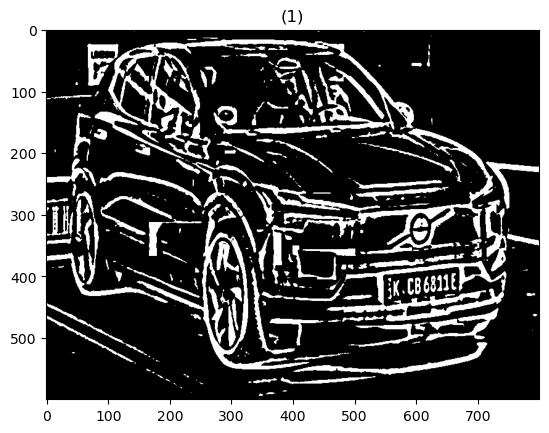

In [219]:
blurred_img = cv.GaussianBlur(output_img , ksize=(5,5) , sigmaX=0)
thresholded_img = cv.adaptiveThreshold(blurred_img , maxValue=255.0 , adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C
                                        ,thresholdType=cv.THRESH_BINARY_INV, blockSize=19,C=9)


show_images([thresholded_img  ])



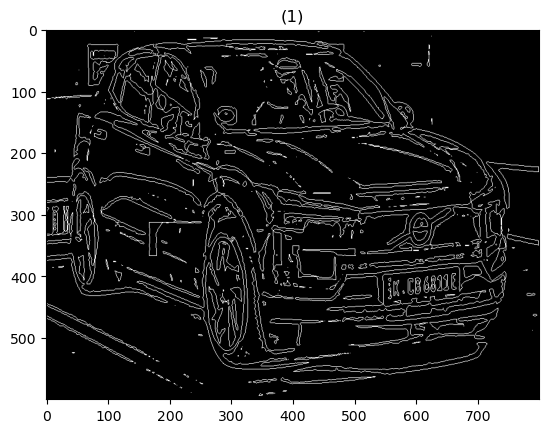

In [220]:



contours ,_ = cv.findContours(thresholded_img , mode = cv.RETR_LIST , method=cv.CHAIN_APPROX_SIMPLE)
temp_result = np.zeros((height,width,channel),dtype=np.uint8)
cv.drawContours(temp_result , contours=contours , contourIdx=-1 , color=(255,255,255))
show_images([temp_result])

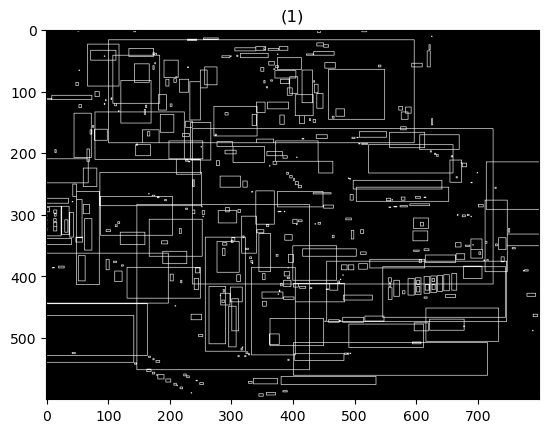

In [221]:
temp_result = np.zeros((height,width,channel),dtype=np.uint8)
contours_dict=[]

for contour in contours:
    x,y,w,h = cv.boundingRect(contour)
    cv.rectangle(temp_result , pt1=(x,y),pt2=(x+w,y+h) , color=(255,255,255) , thickness=1)
    #insert the rectangles into the dict
    contours_dict.append({'contour' : contour , 'x':x,'y':y,'w':w,'h':h ,'cx':x+(w/2),'cy': y+(h/2)})
show_images([temp_result])


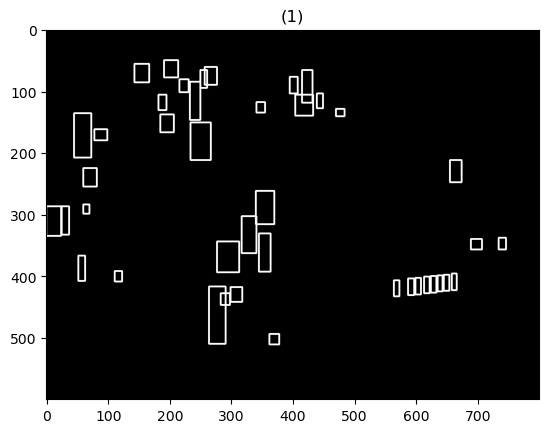

In [222]:
min_area = 149
max_area = 3000
min_width , min_height = 1,5
min_ratio , max_ratio = 0.25, 1.2
possible_contours = []

cnt = 0

for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']

    if min_area<area <max_area  and d['w'] > min_width and d['h'] > min_height and min_ratio < ratio <max_ratio:
        d['idx'] = cnt
        cnt +=1
        possible_contours.append(d)

temp_result = np.zeros((height,width,channel),dtype=np.uint8)
for d in possible_contours:
    cv.rectangle(temp_result , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=2)

show_images([temp_result])


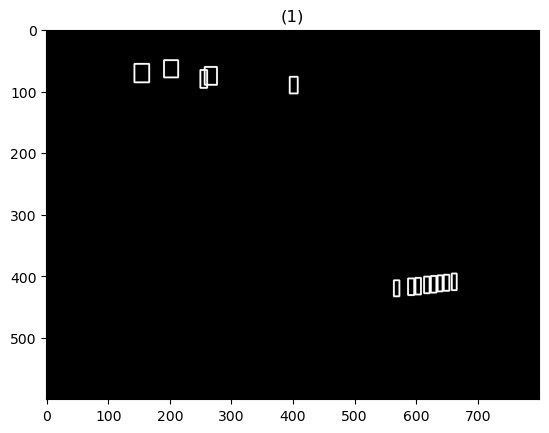

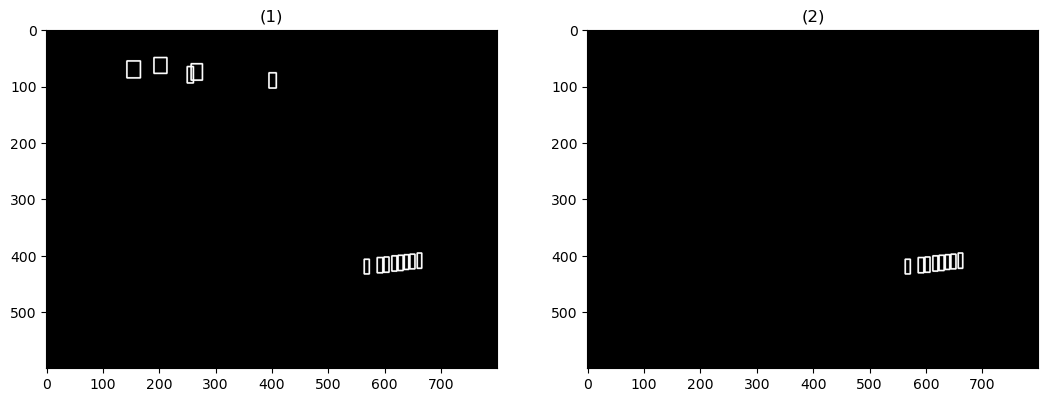

In [223]:
max_diag_multiplyer = 4.1
max_angle_diff = 25.0
max_area_diff = 1.47
max_width_diff = 1.5
max_height_diff = 0.18
min_n_matched = 4

def find_chars(contours_list):
    matched_result_idx = []

    for d1 in contours_list:
        matched_contour_idx = []
        for d2 in contours_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length = np.sqrt(d1['w']**2 + d1['h']**2)
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))

            angle_diff = 90 if dx == 0 else np.degrees(np.arctan(dy / dx))
            
            area_diff = abs((d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h']))
            width_diff = abs((d1['w'] - d2['w']) / d1['w'])
            height_diff = abs((d1['h'] - d2['h']) / d1['h'])

            if distance < diagonal_length * max_diag_multiplyer and angle_diff < max_angle_diff \
                and area_diff < max_area_diff and width_diff < max_width_diff and height_diff < max_height_diff:
                matched_contour_idx.append(d2['idx'])

        if len(matched_contour_idx) < min_n_matched:
            continue

        matched_result_idx.append([d1['idx']] + matched_contour_idx)

        unmatched_contour_idx = [d4['idx'] for d4 in contours_list if d4['idx'] not in matched_contour_idx]

        if not unmatched_contour_idx:
            break

        unmatched_contour = np.array([d for d in contours_list if d['idx'] in unmatched_contour_idx])
        recursive_contour_list = find_chars(unmatched_contour)

        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx

result_idx = find_chars(possible_contours)

matched_resultx = []

for idx_list in result_idx:
    matched_resultx.append(np.take(possible_contours , idx_list))



temp_resultx = np.zeros((height,width,channel),dtype=np.uint8)
for r in matched_resultx:
    for d in r:
        
        cv.rectangle(temp_resultx , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=2)
        
show_images([temp_resultx])
temp_result = np.zeros((height,width,channel),dtype=np.uint8)

matched_result = get_largest_contour_list(matched_resultx)

for r in matched_result:
    for d in r:
        
        cv.rectangle(temp_result , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=2)

show_images([temp_resultx,temp_result])



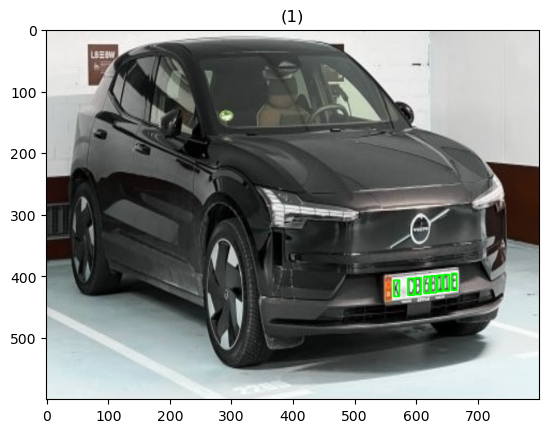

In [224]:
result_idx = find_chars(possible_contours)

matched_resultx = []

for idx_list in result_idx:
    matched_resultx.append(np.take(possible_contours , idx_list))

temp_result = np.zeros((height,width,channel),dtype=np.uint8)


matched_result = get_largest_contour_list(matched_resultx)

temp_result = np.zeros((height,width,channel),dtype=np.uint8)

for r in matched_result:
    for d in r:
        
        cv.rectangle(imgg , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(0,255,0) , thickness=2)

show_images([imgg])

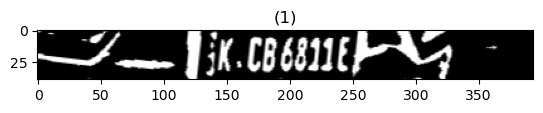

In [225]:
plate_width_padding = 0.6
plate_height_padding = 1.5
min_plate_ratio =1
max_plate_ratio = 2


plate_imgs = []
plate_infos = []

for i , matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars , key=lambda x : x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) /2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) /2

    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['w'] ) * plate_width_padding

    sum_height = 0
    cropped_imgs = []
    for d in sorted_chars:
        sum_height += d['h']


    plate_height = int(sum_height / len(sorted_chars) * plate_height_padding)

    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'] , sorted_chars[0]['cy']]) -
        np.array([sorted_chars[-1]['cx'] , sorted_chars[-1]['cy']])
    )

    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))

    rotation_matrix = cv.getRotationMatrix2D(center=(plate_cx , plate_cy) , angle=angle , scale=1.0)

    img_rotated = cv.warpAffine(thresholded_img , M=rotation_matrix , dsize=(width, height))

    img_cropped = cv.getRectSubPix(
        img_rotated,
        patchSize=(int(plate_width) , int(plate_height)),
        center = (int(plate_cx) , int(plate_cy))
    )

    if img_cropped.shape[1] / img_cropped.shape[0] < min_plate_ratio or min_plate_ratio < img_cropped.shape[1] / img_cropped.shape[0] <  max_plate_ratio:
        continue


    plate_imgs.append(img_cropped)
    
    plate_infos.append({
        'x':int(plate_cx - plate_width /2),
        'y':int(plate_cy - plate_height /2),
        'w':int(plate_width),
        'h':int(plate_height)
    })

    show_images([img_cropped])






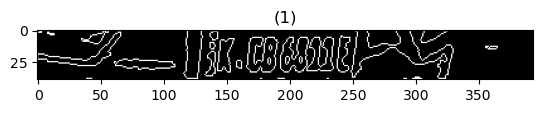

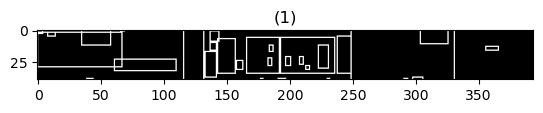

In [226]:
cropped = img_cropped

contours ,_ = cv.findContours(img_cropped , mode = cv.RETR_LIST , method=cv.CHAIN_APPROX_SIMPLE)
temp_result = np.zeros((img_cropped.shape[0],img_cropped.shape[1]),dtype=np.uint8)
cv.drawContours(temp_result , contours=contours , contourIdx=-1 , color=(255,255,255))
show_images([temp_result])

temp_result = np.zeros((img_cropped.shape[0],img_cropped.shape[1]),dtype=np.uint8)
contours_dict=[]

for contour in contours:
    x,y,w,h = cv.boundingRect(contour)
    cv.rectangle(temp_result , pt1=(x,y),pt2=(x+w,y+h) , color=(255,255,255) , thickness=1)
    #insert the rectangles into the dict
    contours_dict.append({'contour' : contour , 'x':x,'y':y,'w':w,'h':h ,'cx':x+(w/2),'cy': y+(h/2)})
show_images([temp_result])

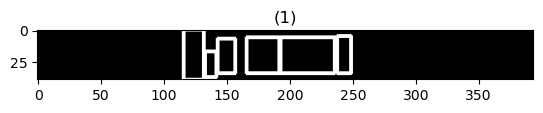

In [227]:
min_area = 149
max_area = 2000
min_width , min_height = 1,5
min_ratio , max_ratio = 0.25 , 1.62

possible_contours = []

cnt = 0

for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']

    if min_area<area <max_area  and d['w'] > min_width and d['h'] > min_height and min_ratio < ratio <max_ratio:
        d['idx'] = cnt
        cnt +=1
        possible_contours.append(d)

temp_result = np.zeros((img_cropped.shape[0],img_cropped.shape[1]),dtype=np.uint8)
for d in possible_contours:
    cv.rectangle(temp_result , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=2)

show_images([temp_result])

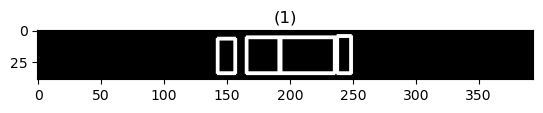

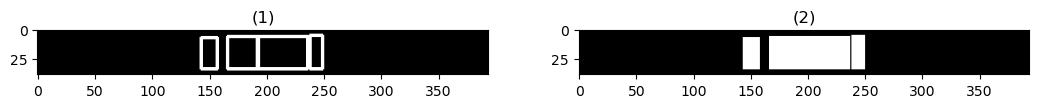

In [228]:
max_diag_multiplyer = 8
max_angle_diff = 25.0
max_area_diff = 10
max_width_diff = 5
max_height_diff = 0.2  #changed to 0.3 to let image 23 to work and also 31
min_n_matched = 2
def find_chars(contours_list):
    matched_result_idx = []

    for d1 in contours_list:
        matched_contour_idx = []
        for d2 in contours_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length = np.sqrt(d1['w']**2 + d1['h']**2)
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))

            angle_diff = 90 if dx == 0 else np.degrees(np.arctan(dy / dx))
            
            area_diff = abs((d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h']))
            width_diff = abs((d1['w'] - d2['w']) / d1['w'])
            height_diff = abs((d1['h'] - d2['h']) / d1['h'])

            if distance < diagonal_length * max_diag_multiplyer and angle_diff < max_angle_diff \
                and area_diff < max_area_diff and width_diff < max_width_diff and height_diff < max_height_diff:
                matched_contour_idx.append(d2['idx'])

        if len(matched_contour_idx) < min_n_matched:
            continue

        matched_result_idx.append([d1['idx']] + matched_contour_idx)

        unmatched_contour_idx = [d4['idx'] for d4 in contours_list if d4['idx'] not in matched_contour_idx]

        if not unmatched_contour_idx:
            break

        unmatched_contour = np.array([d for d in contours_list if d['idx'] in unmatched_contour_idx])
        recursive_contour_list = find_chars(unmatched_contour)

        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx



result_idx = find_chars(possible_contours)

matched_resultx = []

for idx_list in result_idx:
    matched_resultx.append(np.take(possible_contours , idx_list))



temp_resultx = np.zeros((img_cropped.shape[0],img_cropped.shape[1]),dtype=np.uint8)
for r in matched_resultx:
    for d in r:
        
        cv.rectangle(temp_resultx , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=2)
        
show_images([temp_resultx])
temp_result = np.zeros((img_cropped.shape[0],img_cropped.shape[1]),dtype=np.uint8)

matched_result = get_largest_contour_list(matched_resultx)

for r in matched_result:
    for d in r:
        
        cv.rectangle(temp_result , pt1=(d['x'],d['y']) , pt2=(d['x']+d['w'] , d['y']+d['h']) , color=(255,255,255) , thickness=cv.FILLED)

show_images([temp_resultx,temp_result])

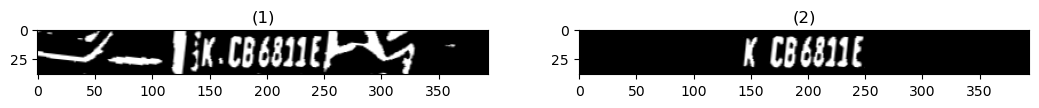

In [229]:
def apply_mask(image, mask):
    """
    Apply a binary mask to an image.
    
    Parameters:
    - image: The input image (numpy array).
    - mask: The binary mask (numpy array), where `1` indicates that the pixel in the image should be kept, 
    and `0` means the pixel should be masked out.
    
    Returns:
    - result: The image after the mask has been applied.
    """
    # Ensure the mask is binary (0 or 1) and has the same shape as the image
    mask = mask.astype(np.uint8)  # Convert mask to uint8 for safety
    if mask.shape != image.shape:
        raise ValueError("The image and mask must have the same shape")

    # Apply the mask to the image: element-wise multiplication
    result = cv.bitwise_and(image, mask)
    
    return result



image = apply_mask(cropped , temp_result)
cv2.imwrite("../trial-2/outputs/output1.png", image)



show_images([cropped,image])

In [230]:
path_to_dataset = r'digits_dataset'
target_img_size = (32, 32) # fix image size because classification algorithms THAT WE WILL USE HERE expect that

# We are going to fix the random seed to make our experiments reproducible 
# since some algorithms use pseudorandom generators
random_seed = 42  
random.seed(random_seed)
np.random.seed(random_seed)

def extract_hog_features(img):
    
    img = cv2.resize(img, target_img_size)
    win_size = (32, 32)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)
    
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 9  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()
    return h.flatten()

In [231]:
def load_dataset():
    features = []
    labels = []

    # Iterate through subfolders (assume folder name is the label)
    for label_folder in os.listdir(path_to_dataset):
        label_path = os.path.join(path_to_dataset, label_folder)
        
        # Ensure it's a directory (skip files)
        if not os.path.isdir(label_path):
            continue
        
        # Extract label from the folder name
        label = label_folder
        
        # Iterate through the images in the folder
        for img_filename in os.listdir(label_path):
            if img_filename.lower().endswith('.jpg'):  # Process only .jpg files
                img_path = os.path.join(label_path, img_filename)
                
                # Read image
                img = cv2.imread(img_path)
                
                # Extract features (e.g., HOG features)
                features.append(extract_hog_features(img))
                
                # Append the label
                labels.append(label)
                
                # Show an update every 1,000 images
                if len(features) % 1000 == 0:
                    print(f"[INFO] Processed {len(features)} images so far.")

    return features, labels


In [232]:
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=7)
}

def run_experiment():
    
    # Load dataset with extracted features
    print('Loading dataset. This will take time ...')
    features, labels = load_dataset()
    print('Finished loading dataset.')
    
    # Since we don't want to know the performance of our classifier on images it has seen before
    # we are going to withhold some images that we will test the classifier on after training 
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, test_size=0.2, random_state=random_seed)
    
    for model_name, model in classifiers.items():
        print('############## Training', model_name, "##############")
        # Train the model only on the training features
        model.fit(train_features, train_labels)
        
        # Test the model on images it hasn't seen before
        accuracy = model.score(test_features, test_labels)
        
        print(model_name, 'accuracy:', accuracy*100, '%')

run_experiment()
"""
You should get the following test accuracies the first time 

KNN accuracy ~ 99.69014084507042 %

"""

Loading dataset. This will take time ...
[INFO] Processed 1000 images so far.
[INFO] Processed 2000 images so far.
[INFO] Processed 3000 images so far.
[INFO] Processed 4000 images so far.
[INFO] Processed 5000 images so far.
[INFO] Processed 6000 images so far.
[INFO] Processed 7000 images so far.
[INFO] Processed 8000 images so far.
[INFO] Processed 9000 images so far.
[INFO] Processed 10000 images so far.
[INFO] Processed 11000 images so far.
[INFO] Processed 12000 images so far.
[INFO] Processed 13000 images so far.
[INFO] Processed 14000 images so far.
[INFO] Processed 15000 images so far.
[INFO] Processed 16000 images so far.
[INFO] Processed 17000 images so far.
[INFO] Processed 18000 images so far.
[INFO] Processed 19000 images so far.
[INFO] Processed 20000 images so far.
[INFO] Processed 21000 images so far.
[INFO] Processed 22000 images so far.
[INFO] Processed 23000 images so far.
[INFO] Processed 24000 images so far.
[INFO] Processed 25000 images so far.
[INFO] Processed 2

'\nYou should get the following test accuracies the first time \n\nKNN accuracy ~ 99.69014084507042 %\n\n'

In [233]:
def split_and_filter_image(image, white_threshold=0.004):

    height, width = image.shape
    
    # split horizontally into 4
    part_width = width // 4   
    accepted_parts = []
    
    # Loop through each part 
    for i in range(4):
        
        x_start = i * part_width
        x_end = (i + 1) * part_width if i != 3 else width  # Ensure the last part includes the remainder
        
        part = image[:, x_start:x_end]  # Take the entire height for each part
        # Count white pixels
        num_white = np.sum(part == 255)
        
        # Calculate the fraction of white pixels in the part
        white_fraction = num_white / (part.size)
        # If the fraction of white pixels is above the threshold, keep the part
        if white_fraction >= white_threshold:
            accepted_parts.append(part)
    
    # Combine accepted parts into one image
    if accepted_parts:
        combined_image = np.concatenate(accepted_parts, axis=1) 
    else:
        # If no parts meet the threshold, return an empty array
        combined_image = np.zeros((height, width), dtype=np.uint8)
    
    return combined_image

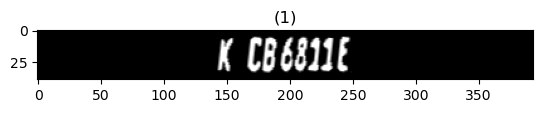

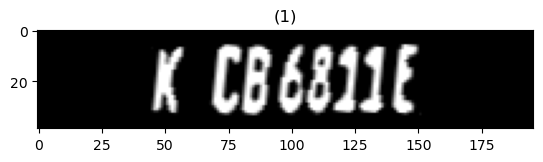

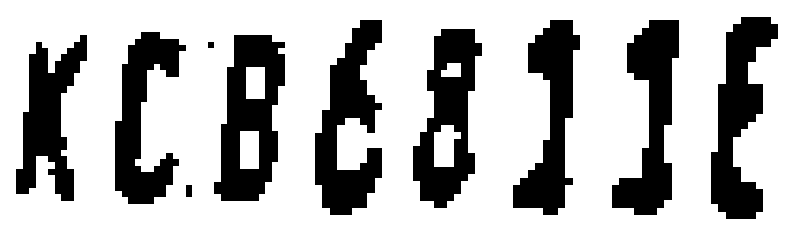

In [234]:
def segment_characters(image):

    image = split_and_filter_image(image)
    show_images([image])
    # Apply binary thresholding
    _, binary_image = cv2.threshold(image,150, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours of the characters
    contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort contours from left to right
    sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    # Initialize list to store segmented characters
    segmented_characters = []
    
    width, height = binary_image.shape

    # Define kernel size for dilation and erosion
    kernel1 = np.ones((3, 3), np.uint8) 


    # Loop through contours and extract individual characters
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        
        # Filter out small contours
        if w > width/8 and h > height/10 and w < width*7/8:
            char_image = binary_image[y:y+h, x:x+w]
            
            # Apply dilation (expands white regions)
            dilated_image = cv2.dilate(char_image, kernel1, iterations=1)
            
            # Apply erosion (shrinks white regions)
            eroded_image = cv2.erode(dilated_image, kernel1, iterations=1)
            
            # Store the result of erosion or dilation or both
            segmented_characters.append(char_image)
            

    return segmented_characters

img = image
show_images([image])
segmented_characters = segment_characters(img)
# Display segmented characters
plt.figure(figsize=(10, 5))
for i, char_image in enumerate(segmented_characters):
    plt.subplot(1, len(segmented_characters), i + 1)
    plt.imshow(char_image, cmap='gray')
    plt.axis("off")
    
plt.show()


In [235]:
knn = classifiers['KNN']

for i, char_image in enumerate(segmented_characters):
    features = extract_hog_features(char_image)
    print(knn.predict([features]))

['K']
['C']
['B']
['E']
['8']
['1']
['1']
['E']


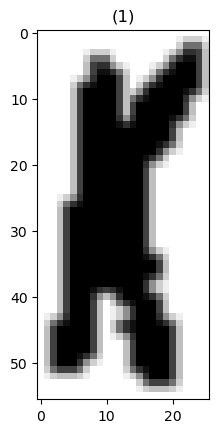

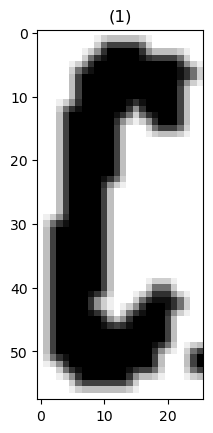

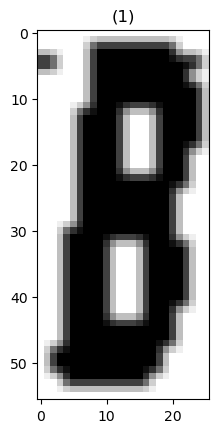

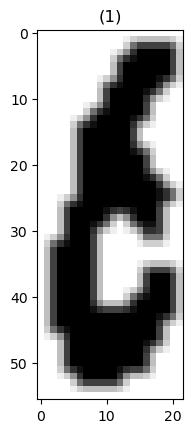

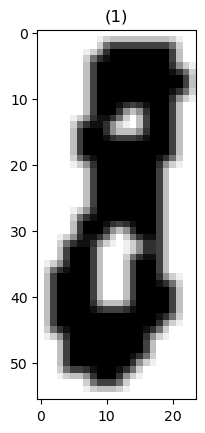

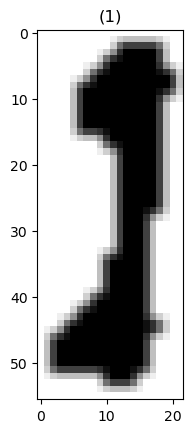

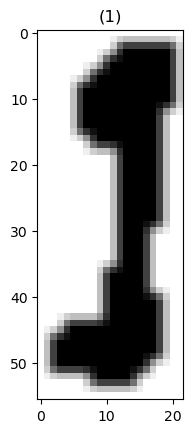

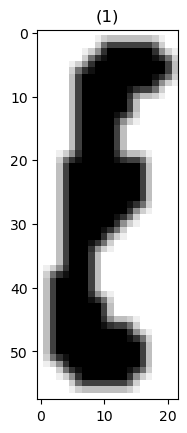

Character 0: K
Character 1: 
Character 2: B
Character 3: 
Character 4: 
Character 5: 
Character 6: J
Character 7: F


In [236]:

ALLOWED_CHARACTERS = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    # Define kernel size for dilation and erosion
kernel2 = np.ones((1, 2), np.uint8)  # You can adjust the size (3x3 is a typical choice)

def preprocess_image(image):
    # Resize the image to make characters larger if necessary
    resized = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

    # Apply erosion (shrinks white regions)
    eroded_image = cv2.erode(resized, kernel2, iterations=1)
    return eroded_image

def classify_characters_with_ocr(segmented_characters):
    recognized_texts = []

    # Loop through segmented characters and apply OCR
    for i, char_image in enumerate(segmented_characters):
        # Preprocess the character image
        preprocessed_image = preprocess_image(char_image)
        # Use Tesseract OCR to recognize the character
        show_images([preprocessed_image])
        text = pytesseract.image_to_string(preprocessed_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=' + ALLOWED_CHARACTERS)
        if len(text) > 0:
            # Take only the first valid character from the recognized text
            text = text[0]

        recognized_texts.append(text)

    return recognized_texts

recognized_texts = classify_characters_with_ocr(segmented_characters)

# Print the recognized characters
for i, text in enumerate(recognized_texts):
    print(f"Character {i}: {text}")



In [237]:
import time

unordered_map = {}

# assume parking for 1 second = 15 pounds (hanghayyar el arqam di bas for testing purposes)

def calculate_fee(plate_number):
    current_time = time.time()  
    
    # Check if the string is already in the unordered map
    if plate_number in unordered_map:
        # Calculate the time difference
        saved_time = unordered_map.pop(plate_number)
        time_diff = current_time - saved_time
        print(f"Car with plate '{plate_number}'. exited after: {time_diff:.2f} seconds., Fee = {time_diff * 15:.2f}")
    else:
        # Insert the string with the current time
        unordered_map[plate_number] = current_time
        print(f"Car with plate '{plate_number}' just entered the parking")

# Example usage
calculate_fee("AH356")
time.sleep(2)  # Sleep for 2 seconds to simulate time passing
calculate_fee("AH356")

Car with plate 'AH356' just entered the parking
Car with plate 'AH356'. exited after: 2.00 seconds., Fee = 30.01
